# Опис проєкту: Аналіз аніме для оптимізації продажів атрибутики

## Ідея проєкту
Цей проєкт спрямований на дослідження популярності аніме, оцінок глядачів та профілів користувачів, щоб визначити найперспективнішу атрибутику для продажу. Ми аналізуватимемо, які аспекти популярних аніме (жанри, тематика) найбільше приваблюють аудиторію. Отримані дані допоможуть прогнозувати, яка продукція (наприклад, фігурки, постери, одяг) зможе забезпечити максимальний дохід.


## Основні завдання
1. **Аналіз популярності аніме**:
   - Виявлення найпопулярніших аніме за середнім рейтингом та кількістю оцінок.
   - Вивчення жанрових уподобань глядачів.

2. **Сегментація аудиторії**:
   - Розподіл користувачів на групи за інтересами та демографічними характеристиками.
   - Визначення цільових категорій користувачів для створення атрибутики.

3. **Прогнозування продажів**:
   - Формування рекомендацій щодо типів продукції, які будуть популярними серед окремих сегментів аудиторії.


In [12]:
import pandas as pd
anime_dataset = pd.read_csv('anime-dataset-2023.csv')
anime_dataset.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


# Опис **anime_dataset**

Цей датасет містить детальну інформацію про аніме, включаючи ключові характеристики, рейтинги та популярність серед користувачів. Нижче наведено основні поля:

- **anime_id**: Унікальний ідентифікатор аніме.
- **Name**: Оригінальна назва аніме.
- **English name**: Назва англійською мовою (за наявності).
- **Other name**: Альтернативні назви аніме (якщо є).
- **Score**: Середній рейтинг аніме (шкала 1-10).
- **Genres**: Жанри аніме (наприклад, екшн, комедія, драма).
- **Synopsis**: Короткий опис сюжету.
- **Type**: Тип аніме (серіал, фільм, OVA тощо).
- **Episodes**: Кількість епізодів.
- **Aired**: Дати виходу аніме.
- **Studios**: Студії-виробники аніме.
- **Source**: Джерело адаптації (наприклад, манґа чи лайт-новел).
- **Duration**: Тривалість одного епізоду (у хвилинах).
- **Rating**: Віковий рейтинг (наприклад, PG-13).
- **Rank**: Рейтинг серед усіх аніме за популярністю.
- **Popularity**: Популярність аніме серед користувачів.
- **Favorites**: Кількість додавань до списків улюбленого.
- **Scored By**: Кількість користувачів, які оцінили аніме.
- **Members**: З


In [17]:
users_details = pd.read_csv('users-details-2023.csv')
users_details.head()

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


# Опис **users_details**

Цей датасет містить інформацію про користувачів аніме-платформи, включаючи їх активність, демографічні дані та перегляд аніме. Нижче наведено основні поля:

- **ID**: Унікальний ідентифікатор користувача.
- **Username**: Ім'я користувача.
- **Gender**: Стать користувача (якщо вказано).
- **Birthday**: Дата народження користувача (за наявності).
- **Location**: Географічне розташування користувача (за наявності).
- **Joined**: Дата реєстрації на платформі.
- **Days Watched**: Загальна кількість днів, витрачених на перегляд аніме.
- **Mean Score**: Середній рейтинг, який користувач ставить переглянутим аніме.
- **Watching**: Кількість аніме, які користувач активно переглядає.
- **Completed**: Кількість завершених переглядів аніме.
- **On Hold**: Кількість аніме, які користувач поставив "на паузу".
- **Dropped**: Кількість аніме, від яких користувач відмовився.
- **Plan to Watch**: Кількість аніме, які користувач планує переглянути.
- **Total Entries**: Загальна кількість записів у списку користувача.
- **Rewatched**: Кількість переглядів аніме повторно.
- **Episodes Watched**: Загальна кількість переглянутих епізодів.

Цей датасет використовується для аналізу активності користувачів, їх уподобань та створення персоналізованих рекомендацій.


In [22]:
users_score_2023 = pd.read_csv('users-score-2023.csv')
# Перевірка нечислових значень у стовпці 'rating'
non_numeric_values = users_score_2023[pd.to_numeric(users_score_2023['rating'], errors='coerce').isna()]

# Виведення унікальних некоректних значень
non_numeric_unique_values = non_numeric_values['rating'].unique()
users_score_2023.head()


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


# Опис **users_score**

Цей датасет містить інформацію про оцінки, які користувачі поставили різним аніме. Він дозволяє аналізувати індивідуальні вподобання користувачів і загальну популярність аніме. Основні поля:

- **user_id**: Унікальний ідентифікатор користувача.
- **Username**: Ім'я користувача.
- **anime_id**: Унікальний ідентифікатор аніме.
- **Anime Title**: Назва аніме.
- **rating**: Оцінка, яку користувач поставив аніме (шкала 1-10).

Цей датасет корисний для побудови рекомендаційних систем, аналізу популярності аніме серед різних сегментів аудиторії та вивчення індивідуальних вподобань користувачів.


# Завдання: Знайти найрейтинговіше аніме в кожній країні

## Формулювання завдання:
Визначити найрейтинговіше аніме для кожної країни на основі оцінок користувачів. Результат має бути представлений у вигляді інтерактивної карти, яка показує назву найрейтинговішого аніме при наведенні на країну.

## Кроки виконання:
1. **Підготовка даних**:
   - Об’єднати датасети `users_details` (для даних про країни) та `users_score` (для даних про оцінки аніме).
   - Видалити записи без вказаної країни або без оцінок.

2. **Аналіз даних**:
   - Згрупувати дані за країнами та аніме.
   - Для кожної країни обрати аніме з найвищим середнім рейтингом.

3. **Візуалізація**:
   - Побудувати інтерактивну карту світу, використовуючи бібліотеки `plotly` чи `folium`.
   - При наведенні на країну відображати назву найрейтинговішого аніме.

## Очікуваний результат:
Інтерактивна карта, на якій для кожної країни відображається найрейтинговіше аніме, засноване на оцінках користувачів.


In [28]:
import pandas as pd

# Словник для штатів США
us_states = {
    'Alabama': 'USA', 'Alaska': 'USA', 'Arizona': 'USA', 'Arkansas': 'USA', 'California': 'USA', 
    'Colorado': 'USA', 'Connecticut': 'USA', 'Delaware': 'USA', 'Florida': 'USA', 'Georgia': 'USA',
    'Hawaii': 'USA', 'Idaho': 'USA', 'Illinois': 'USA', 'Indiana': 'USA', 'Iowa': 'USA', 
    'Kansas': 'USA', 'Kentucky': 'USA', 'Louisiana': 'USA', 'Maine': 'USA', 'Maryland': 'USA', 
    'Massachusetts': 'USA', 'Michigan': 'USA', 'Minnesota': 'USA', 'Mississippi': 'USA', 
    'Missouri': 'USA', 'Montana': 'USA', 'Nebraska': 'USA', 'Nevada': 'USA', 'New Hampshire': 'USA', 
    'New Jersey': 'USA', 'New Mexico': 'USA', 'New York': 'USA', 'North Carolina': 'USA', 
    'North Dakota': 'USA', 'Ohio': 'USA', 'Oklahoma': 'USA', 'Oregon': 'USA', 'Pennsylvania': 'USA',
    'Rhode Island': 'USA', 'South Carolina': 'USA', 'South Dakota': 'USA', 'Tennessee': 'USA', 
    'Texas': 'USA', 'Utah': 'USA', 'Vermont': 'USA', 'Virginia': 'USA', 'Washington': 'USA',
    'West Virginia': 'USA', 'Wisconsin': 'USA', 'Wyoming': 'USA'
}

# Функція для розділення міста і країни
def extract_city_country(location):
    if isinstance(location, str):  # Перевіряємо, чи location є рядком
        if location in us_states:
            return location, us_states[location]
        else:
            parts = location.split(',')
            if len(parts) == 1:
                return parts[0].strip(), None
            elif len(parts) >= 2:
                city = parts[0].strip()
                country = parts[1].strip()
                return city, country
    return None, None  # Якщо location не є рядком

# Переконаємося, що df є DataFrame
df = users_details.copy()
df


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731285,1291083,Dolopa,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731286,1291085,alenrobnik,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,21.4,8.22,16.0,58.0,9.0,1.0,42.0,126.0,0.0,1239.0
731287,1291087,Oblongata,NaN,1993-01-30T00:00:00+00:00,NaN,2012-05-06T00:00:00+00:00,51.3,7.53,38.0,175.0,0.0,9.0,211.0,433.0,2.0,3010.0
731288,1291091,Etnota,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Застосовуємо функцію до локацій
df[['City', 'Country']] = df['Location'].apply(lambda loc: pd.Series(extract_city_country(loc)))

# Замінюємо місто на країну, якщо країна присутня
df['City'] = df.apply(lambda row: row['Country'] if row['Country'] else row['City'], axis=1)

# Перевіряємо, чи місто входить у країну
df['Match'] = df.apply(lambda row: row['City'] in row['Country'] if row['City'] and row['Country'] else False, axis=1)

# Виводимо результат
df.head()

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched,City,Country,Match
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0,USA,USA,True
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0,Norway,Norway,True
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0,Australia,Australia,True
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0,None,None,False
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0,None,None,False


In [32]:
# Оновлюємо стовпець Match, залишаючи лише країну, якщо результат True
df['Match'] = df.apply(lambda row: row['Country'] if row['Match'] else None, axis=1)

# Видаляємо рядки, де Match є None (колишній False)
df = df.dropna(subset=['Match'])

# Виводимо результат
df.head()


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched,City,Country,Match
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0,USA,USA,USA
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0,Norway,Norway,Norway
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0,Australia,Australia,Australia
5,20,vondur,Male,1988-01-25T00:00:00+00:00,"Bergen, Norway",2005-01-05T00:00:00+00:00,73.1,8.06,11.0,94.0,11.0,2.0,20.0,138.0,7.0,4374.0,Norway,Norway,Norway
11,66,Hiromi,Male,1990-02-09T00:00:00+00:00,"Calgary, AB",2005-04-01T00:00:00+00:00,70.6,7.53,34.0,148.0,13.0,6.0,10.0,211.0,50.0,4117.0,AB,AB,AB


In [34]:
# Вибираємо лише user_id, які є у 'Mal ID'
valid_ids = df['Mal ID']

# Фільтруємо users_score_2023
filtered_data = users_score_2023[users_score_2023['user_id'].isin(valid_ids)]
filtered_data.head()


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [36]:
# Об'єднання двох датасетів: додаємо інформацію про країну
merged_data = pd.merge(df, filtered_data, left_on='Mal ID', right_on='user_id', how='inner')


In [38]:
# Виправлення колонок Username
merged_data.rename(columns={'Username_x': 'Username_details', 'Username_y': 'Username_scores'}, inplace=True)

# Групування за країною та пошук найвищого рейтингу
grouped = (
    merged_data.groupby('Country', as_index=False, group_keys=False)
    .apply(lambda group: group.loc[group['rating'].idxmax()])  
    .reset_index(drop=True)
)

# Залишаємо лише потрібні колонки
result = grouped[['Country', 'Username_scores', 'Anime Title', 'rating']]

# Вивід результату
result.head()

/var/folders/c_/5f3n0kt12bbff19hstw8jn280000gn/T/ipykernel_4712/3400829770.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.loc[group['rating'].idxmax()])


,Country,Username_scores,Anime Title,rating
0,"""Holy Land""(=israel)",martaine,Bakemonogatari,10
1,"""Midgard"" 616",LokiAgdistis,91 Days,10
2,"""Wyckoff""",Natendowii,Shin Mazinger Shougeki! Z-hen,10
3,#6851,YouYouHockeyShow,FLCL,10
4,&Ouml;sterreich,GebackeneEnte,Gankutsuou,10


In [40]:
import geopandas as gpd
import folium
import random

# Завантаження геоданих
shapefile_path = "/Users/julia/final project/ne_110m_admin_0_countries (1)/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Перейменування колонки для відповідності
world = world.rename(columns={"NAME": "Country"})  # Залежно від вашого датасету

# Об'єднання геоданих із даними про популярне аніме
merged = world.merge(result, on='Country', how='left')

# Унікальні аніме для визначення кольорів
unique_anime = merged['Anime Title'].dropna().unique()
anime_colors = {anime: f"#{random.randint(0, 0xFFFFFF):06x}" for anime in unique_anime}  # Генерація випадкових кольорів

# Функція для стилю країн
def style_function(feature):
    anime_title = feature['properties'].get('Anime Title', None)
    return {
        'fillColor': anime_colors.get(anime_title, "#d3d3d3"),  # Колір для аніме, сірий якщо нема
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    }

# Створення карти
m = folium.Map(location=[20, 0], zoom_start=2)

# Додавання GeoJSON із кастомними стилями
folium.GeoJson(
    merged,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['Country', 'Anime Title'],  # Поля для відображення
        aliases=['Country:', 'Popular Anime:'],  # Заголовки
        localize=True,
    ),
).add_to(m)

# Збереження карти
m.save("anime_colored_map.html")
m


# Завдання: Знайти найрейтинговіші аніме для України

## Формулювання завдання:
На основі даних про оцінки користувачів необхідно визначити аніме, яке отримало найвищі оцінки від користувачів з України. 

### Результат:
Результат повинен містити наступну інформацію:
- Назву країни (Україна);
- Ім’я користувача, який поставив оцінку;
- Назву найрейтинговішого аніме;
- Рейтинг цього аніме.


In [45]:
ukraine_result = grouped[grouped['Country'] == 'Ukraine']
result = ukraine_result[['Country', 'Username_scores', 'Anime Title', 'rating']]
result

,Country,Username_scores,Anime Title,rating
3611,Ukraine,graywolf,Code Geass: Hangyaku no Lelouch,10


# Завдання: Виявлення проблем із даними та аналіз без географічної прив'язки

## Проблема:
У датасеті недостатньо інформації про користувачів з України, а також виявлено, що багато користувачів неправильно ввели дані про своє місто та країну. Це створює труднощі для точного визначення найрейтинговіших аніме в географічному розрізі.

## Подальші дії:
Для уникнення неточностей ми пропонуємо перевірити інформацію про рейтинг та популярність аніме без географічної прив'язки. Це дозволить отримати загальні висновки про найкращі аніме серед усіх користувачів у доступному датасеті.


In [48]:
# Видаляємо рядки, де Score має значення 'UNKNOWN' або не є числовим
anime_dataset_cleaned = anime_dataset[pd.to_numeric(anime_dataset["Score"], errors="coerce").notna()].copy()

# Перетворюємо Score у числовий тип для сортування
anime_dataset_cleaned["Score"] = anime_dataset_cleaned["Score"].astype(float)

# Вибір 10 аніме з найвищими оцінками
top_10_popular_anime = anime_dataset_cleaned.sort_values(by="Score", ascending=False).head(10)

# Виведення результату
top_10_popular_anime[["Name", "English name", "Score", "Popularity"]]


,Name,English name,Score,Popularity
3961,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,9.10,3
16617,Bleach: Sennen Kessen-hen,Bleach: Thousand-Year Blood War,9.07,464
5667,Steins;Gate,Steins;Gate,9.07,13
9880,Gintama°,Gintama Season 4,9.06,331
22348,Shingeki no Kyojin: The Final Season - Kankets...,Attack on Titan: The Final Season - Final Chap...,9.05,479
14865,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,9.05,24
17572,Kaguya-sama wa Kokurasetai: Ultra Romantic,Kaguya-sama: Love is War - Ultra Romantic,9.05,198
6456,Hunter x Hunter (2011),Hunter x Hunter,9.04,10
5989,Gintama',Gintama Season 2,9.04,386
15525,Gintama: The Final,Gintama: The Very Final,9.04,1564


In [50]:
# Очищення даних: видаляємо нечислові значення у Score
anime_dataset_cleaned = anime_dataset[pd.to_numeric(anime_dataset["Score"], errors="coerce").notna()].copy()

# Перетворюємо Score у числовий тип
anime_dataset_cleaned["Score"] = anime_dataset_cleaned["Score"].astype(float)

# Сортування за популярністю (від найменшого до найбільшого)
top_10_popular_anime = anime_dataset_cleaned.sort_values(by="Popularity", ascending=True).head(10)

# Виведення результату
top_10_popular_anime[["Name", "English name", "Score", "Popularity"]]



,Name,English name,Score,Popularity
7428,Shingeki no Kyojin,Attack on Titan,8.54,1
1393,Death Note,Death Note,8.62,2
3961,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,9.10,3
10408,One Punch Man,One Punch Man,8.50,4
6596,Sword Art Online,Sword Art Online,7.20,5
11134,Boku no Hero Academia,My Hero Academia,7.89,6
14539,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,8.50,7
10,Naruto,Naruto,7.99,8
8619,Tokyo Ghoul,Tokyo Ghoul,7.79,9
6456,Hunter x Hunter (2011),Hunter x Hunter,9.04,10


# Аналіз даних

## Перший набір даних:
Містить аніме з найвищими рейтингами (*Score*) та різною популярністю (*Popularity*).

### Основні спостереження:
1. **Лідери за рейтингом**:
   - Найвищий рейтинг має *Fullmetal Alchemist: Brotherhood* (9.10), при цьому популярність займає 3 місце.
   - *Bleach: Thousand-Year Blood War* (9.07) має високий рейтинг, але низьку популярність (464).

2. **Збалансовані показники**:
   - *Steins;Gate* (9.07, Popularity 13) демонструє хороше поєднання рейтингу та популярності.
   - *Hunter x Hunter (2011)* (9.04, Popularity 10) також знаходиться серед аніме з високими показниками.

3. **Аніме з низькою популярністю**:
   - *Gintama: The Very Final* має високий рейтинг (9.04), але популярність займає лише 1564 місце.

---

## Другий набір даних:
Фокусується на популярності (*Popularity*) з урахуванням рейтингу (*Score*).

### Основні спостереження:
1. **Лідери за популярністю**:
   - Найпопулярніше аніме — *Attack on Titan* (Popularity 1) з оцінкою 8.54.
   - *Death Note* займає друге місце за популярністю (Popularity 2), рейтинг 8.62.

2. **Високі рейтинги серед популярних**:
   - *Fullmetal Alchemist: Brotherhood* поєднує найвищий рейтинг (9.10) і високу популярність (Popularity 3).
   - *Hunter x Hunter (2011)* (Score 9.04) є одним з найпопулярніших (Popularity 10).

3. **Аніме з нижчими рейтингами та високою популярністю**:
   - *Naruto* (Score 7.99, Popularity 8) демонструє, що популярність не завжди корелює з високим рейтингом.

---

## Загальні висновки:
1. *Fullmetal Alchemist: Brotherhood* — лідер за рейтингом (9.10) і одним з найпопулярніших (Popularity 3), що робить його універсальним фаворитом.
2. Популярні серіали, як *Attack on Titan* і *Death Note*, залишаються на вершині завдяки великій аудиторії, незважаючи на трохи нижчі рейтинги.
3. Аніме, як *Bleach: Thousand-Year Blood War* та *Gintama: The Very Final*, мають високий рейтинг, але відносно низьку популярність, що може вказувати на сильну, але вузьку аудиторію.

Ці два набори даних демонструють, що популярність та рейтинг аніме не завжди йдуть пліч-о-пліч, і обидва показники важливі для комплексного аналізу.


# Завдання: Визначення популярності жанрів аніме

## Формулювання завдання:
На основі доступних даних потрібно проаналізувати популярність різних жанрів аніме серед користувачів. Це допоможе визначити жанри, які найбільше привертають увагу аудиторії, а також виявити потенційно недооцінені жанри.


In [54]:
# Розділення жанрів та аналіз популярності
genre_analysis = anime_dataset_cleaned.assign(
    Genres=anime_dataset_cleaned['Genres'].str.split(', ')
).explode('Genres').groupby('Genres').agg({
    'Score': 'mean',           # Середній рейтинг для жанру
    'Popularity': 'min'        # Найвища популярність (мінімальне значення)
}).sort_values(by='Score', ascending=False)

print(genre_analysis)


                  Score  Popularity
Genres                             
Award Winning  7.296308           1
Mystery        6.995093          30
Suspense       6.962963           1
Drama          6.850645           1
Romance        6.804509           5
Supernatural   6.744600           2
Sports         6.722046          36
Action         6.674112           1
Adventure      6.673997           3
Gourmet        6.627664          58
Girls Love     6.591553         413
Fantasy        6.591243           3
Sci-Fi         6.563554          13
Comedy         6.522961           4
Boys Love      6.500533         381
Slice of Life  6.475667          90
Ecchi          6.431904          16
Horror         6.148137           9
Erotica        6.124419         366
Hentai         6.065379        1259
UNKNOWN        5.855921         650
Avant Garde    5.143932          45


# Короткий аналіз популярності жанрів

## Основні спостереження:

1. **Лідери за рейтингом (*Score*)**:
   - Найвищий середній рейтинг мають жанри:
     - *Award Winning* (7.30)
     - *Mystery* (7.00)
     - *Suspense* (6.96)
   - Ці жанри демонструють високу якість, хоча популярність може варіюватися.

2. **Лідери за популярністю (*Popularity*)**:
   - Найпопулярніші жанри:
     - *Award Winning* (Popularity 1)
     - *Drama* (Popularity 1)
     - *Action* (Popularity 1)
   - Ці жанри поєднують високі рейтинги та значний інтерес аудиторії.

3. **Недооцінені жанри**:
   - *Suspense* має високий рейтинг (6.96), але займає лише 1 місце за популярністю.
   - *Gourmet* (6.63) демонструє середній рейтинг, але популярність є низькою (58 місце).

4. **Нішеві жанри**:
   - *Hentai* та *Erotica* мають низький рейтинг (6.06 і 6.12 відповідно), але дуже високу популярність (1259 і 366 місце).
   - *Boys Love* та *Girls Love* демонструють подібний тренд із помірними рейтингами (~6.5) та популярністю (381 і 413 місце).

5. **Аутсайдери**:
   - Жанри *Avant Garde* (5.14) та *UNKNOWN* (5.86) мають найнижчі рейтинги та слабку популярність.

## Висновок:
Жанри *Award Winning*, *Drama*, *Mystery* та *Suspense* вважаються найкращими за якістю (рейтинг), тоді як жанри, як *Hentai* та *Erotica*, залишаються популярними, незважаючи на низький рейтинг. Деякі жанри, такі як *Gourmet* і *Slice of Life*, мають потенціал для залучення більшої аудиторії завдяки своїм середнім оцінкам.


# Завдання: Відслідкувати уподобання чоловіків і жінок

## Формулювання завдання:
Потрібно проаналізувати уподобання чоловіків і жінок у виборі жанрів аніме, щоб визначити, які жанри є більш популярними серед кожної статі.

## Кроки виконання:

1. **Підготовка даних**:
   - Використати датасети `users_details` (для інформації про стать) та `users_score` (для оцінок аніме).
   - Об'єднати дані з датасетом `anime_dataset` (для отримання жанрів аніме).

2. **Розділення за статтю**:
   - Виділити групи користувачів за статтю (чоловіки та жінки).
   - Обчислити середні оцінки (*Score*) для кожного жанру окремо для чоловіків та жінок.

3. **Порівняння уподобань**:
   - Визначити жанри, яким надають перевагу чоловіки (вищий середній рейтинг серед чоловіків).
   - Визначити жанри, які більше цінують жінки (вищий середній рейтинг серед жінок).
   - Виявити жанри з однаковими вподобаннями серед обох статей.

4. **Візуалізація результатів**:
   - Побудувати графік, який порівнює середні оцінки жанрів між чоловіками та жінками.
   - Побудувати таблицю із топ-5 жанрами для кожної статі.

## Очікуваний результат:
Список жанрів, які є найпопулярнішими серед чоловіків і жінок, з середніми оцінками для кожної групи, а також візуалізація для наочного порівняння уподобань.


In [60]:
print(users_score_2023.columns)  # Перевіряємо назви стовпців у users_score_2023
print(users_details.columns)    # Перевіряємо назви стовпців у users_details
print(anime_dataset.columns)    # Перевіряємо назви стовпців у anime_dataset


Index(['user_id', 'Username', 'anime_id', 'Anime Title', 'rating'], dtype='object')
Index(['Mal ID', 'Username', 'Gender', 'Birthday', 'Location', 'Joined',
       'Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched'],
      dtype='object')
Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')


In [69]:
# Об'єднуємо оцінки з даними про стать
merged_scores = pd.merge(users_score_2023, users_details[['Mal ID', 'Gender']], 
                         left_on='user_id', right_on='Mal ID', how='inner')

# Об'єднуємо з інформацією про аніме
merged_data = pd.merge(merged_scores, anime_dataset[['anime_id', 'Name']], 
                       on='anime_id', how='inner')

# Групування даних
gender_analysis = merged_data.groupby(['Name', 'Gender']).agg({
    'rating': 'mean',       # Середня оцінка
    'user_id': 'count'      # Кількість користувачів
}).rename(columns={'rating': 'Average Rating', 'user_id': 'User Count'}).reset_index()


In [71]:
# Розділяємо дані за статтю
male_ratings = gender_analysis[gender_analysis['Gender'] == 'Male']
female_ratings = gender_analysis[gender_analysis['Gender'] == 'Female']

# З'єднуємо дані для порівняння
comparison = pd.merge(male_ratings, female_ratings, on='Name', suffixes=('_Male', '_Female'))

# Додаємо різницю між оцінками чоловіків і жінок
comparison['Rating Difference'] = comparison['Average Rating_Male'] - comparison['Average Rating_Female']

# Сортуємо за різницею оцінок
comparison_sorted = comparison.sort_values(by='Rating Difference', ascending=False)


In [73]:
# Найпопулярніші 10 аніме для чоловіків
top_10_male = comparison_sorted.sort_values(by='Average Rating_Male', ascending=False).head(10)

# Найпопулярніші 10 аніме для жінок
top_10_female = comparison_sorted.sort_values(by='Average Rating_Female', ascending=False).head(10)

# Вивід таблиць
print("Топ-10 аніме для чоловіків:")
print(top_10_male[['Name', 'Average Rating_Male']])

print("\nТоп-10 аніме для жінок:")
print(top_10_female[['Name', 'Average Rating_Female']])


Топ-10 аніме для чоловіків:
                             Name  Average Rating_Male
13294                Yuuseiboushi                 10.0
8111                    Motto ne!                 10.0
3218               Emerald Planet                 10.0
2779           Distorted Princess                 10.0
9871               Ring no Seraph                 10.0
7602           Mao Yao de Huo Han                 10.0
4294       Habataki no Fortissimo                 10.0
2153              Cleaning Switch                 10.0
9244                Perfect Sekai                 10.0
8882   Onegai My Melody: Yuu & Ai                 10.0

Топ-10 аніме для жінок:
                                                    Name  \
3705                              Gakkou no Kaidan (OVA)   
10165                                     Sakura no Ondo   
13354                       Zanting! Rang Wo Cha Gonglüe   
8724                                                 Odo   
10770                       Shinseiki Duel

# Висновок

Топ-10 аніме для чоловіків і жінок демонструють цікаві особливості:

## 1. **Оцінки**
- Усі аніме в обох списках отримали максимальний рейтинг (10.0), що свідчить про високу оцінку з боку глядачів.

## 2. **Специфічність**
- Представлені аніме є менш відомими або нішевими серіями. Це може свідчити про те, що ці рейтинги базуються на невеликій, але дуже відданій групі користувачів.

## 3. **Відмінності у вподобаннях**
- **Чоловіки**:
  - У списку домінують серії з унікальними назвами, які можуть представляти жанри фантастики або пригод (*Emerald Planet*, *Habataki no Fortissimo*).
- **Жінки**:
  - Віддають перевагу серіям із сімейними або традиційними темами (*Sakura no Ondo*, *Gakkou no Kaidan*).

## Загальний висновок
Ці результати відображають вплив нішевих аудиторій на оцінювання, де мала, але активна група користувачів суттєво підвищує середній рейтинг для певних аніме.


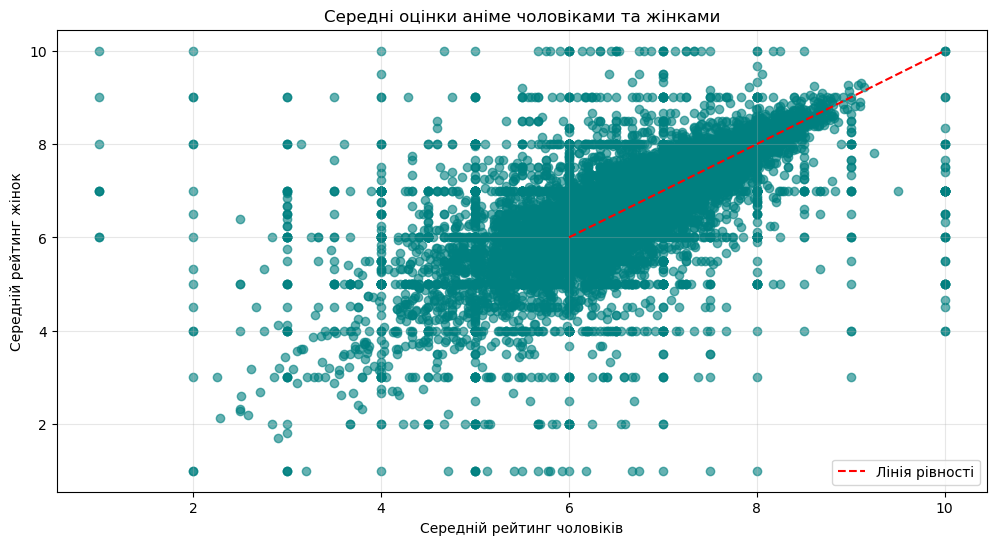

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(comparison_sorted['Average Rating_Male'], comparison_sorted['Average Rating_Female'], alpha=0.6, color='teal')

# Лінія рівності
plt.plot([6, 10], [6, 10], color='red', linestyle='--', label='Лінія рівності')

plt.title('Середні оцінки аніме чоловіками та жінками')
plt.xlabel('Середній рейтинг чоловіків')
plt.ylabel('Середній рейтинг жінок')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



### Висновок з графіку

1. **Схожість оцінок**:
   - Більшість точок розташовані поруч із лінією рівності, що свідчить про схожі оцінки аніме чоловіками та жінками.

2. **Відмінності**:
   - Точки вище лінії: жінки ставлять вищі оцінки.
   - Точки нижче лінії: чоловіки ставлять вищі оцінки.

3. **Критичність**:
   - Чоловіки частіше ставлять нижчі оцінки, що свідчить про більшу критичність.
   - Жінки здебільшого оцінюють аніме вище.

### Загальний висновок:
Оцінки чоловіків і жінок загалом схожі, але є аніме, які мають значні відмінності в популярності між статями.


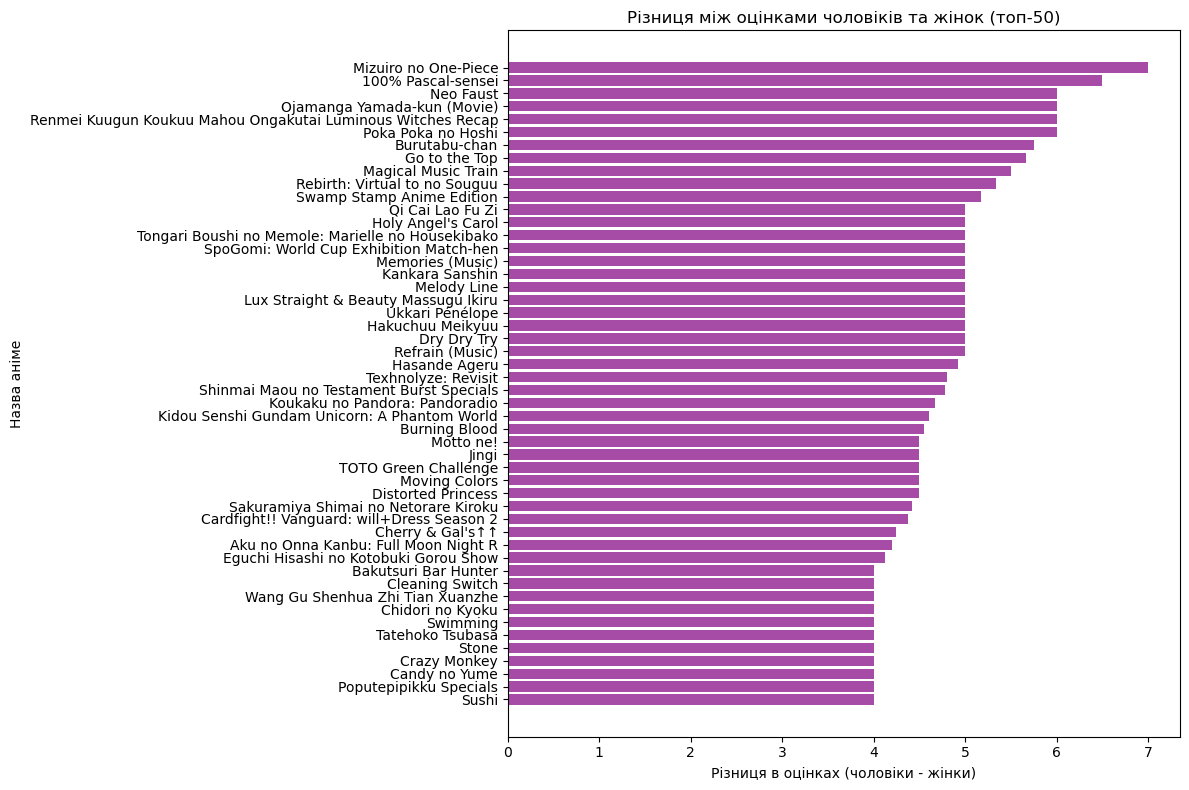

In [81]:
top_50_difference = comparison_sorted.head(50)

plt.figure(figsize=(12, 8))
plt.barh(top_50_difference['Name'], top_50_difference['Rating Difference'], color='purple', alpha=0.7)
plt.title('Різниця між оцінками чоловіків та жінок (топ-50)')
plt.xlabel('Різниця в оцінках (чоловіки - жінки)')
plt.ylabel('Назва аніме')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



### Висновок з графіку

1. **Різниця в оцінках**:
   - Графік показує аніме з найбільшою різницею між оцінками чоловіків і жінок.
   - Найвищі значення (5-7 балів) демонструють аніме, які чоловіки оцінили значно вище, ніж жінки.

2. **Домінування чоловічих оцінок**:
   - Топ-аніме на графіку значною мірою переважають оцінки чоловіків.
   - Це свідчить про те, що в деяких випадках уподобання чоловіків значно відрізняються від жіночих.

3. **Нішеві аніме**:
   - Деякі представлені аніме мають обмежену популярність і ймовірно орієнтовані на специфічну аудиторію, що може пояснювати великі різниці.

4. **Відсутність жіночого домінування**:
   - На графіку переважають позитивні значення різниці, що вказує на те, що в цьому наборі даних немає аніме, які жінки оцінили значно вище, ніж чоловіки.

### Загальний висновок:
Графік демонструє, що чоловіки мають сильніші уподобання до деяких аніме, які не знаходять такого ж відгуку серед жінок. Це може бути корисним для цільового маркетингу або рекомендацій.


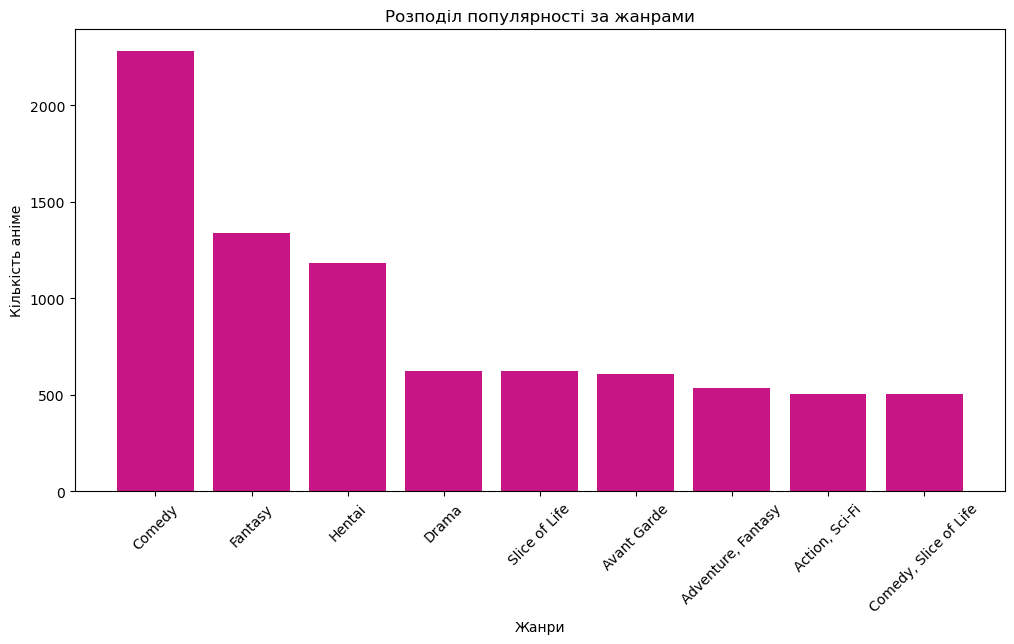

In [89]:
# Improved code to remove "UNKNOWN" genre and make the colors brighter

# Filter out "UNKNOWN" genre
filtered_genre_counts = anime_dataset['Genres'].value_counts().head(10)
filtered_genre_counts = filtered_genre_counts[filtered_genre_counts.index != 'UNKNOWN']

# Visualization with brighter color
plt.figure(figsize=(12, 6))
plt.bar(filtered_genre_counts.index, filtered_genre_counts.values, color='mediumvioletred')  # Brighter color
plt.title('Розподіл популярності за жанрами')
plt.xlabel('Жанри')
plt.ylabel('Кількість аніме')
plt.xticks(rotation=45)
plt.show()


### Висновок

1. **Лідери серед жанрів**:
   - Найпопулярнішим жанром є *Comedy*, значно випереджаючи інші.
   - *Fantasy* та *Hentai* займають друге і третє місця відповідно.

2. **Менш популярні жанри**:
   - Жанри, як *Slice of Life*, *Avant-Garde*, та *Adventure*, мають меншу кількість аніме.

3. **Загальна картина**:
   - Комедійний жанр є основним фаворитом серед глядачів, тоді як специфічні жанри, як *Avant-Garde*, привертають менше уваги.


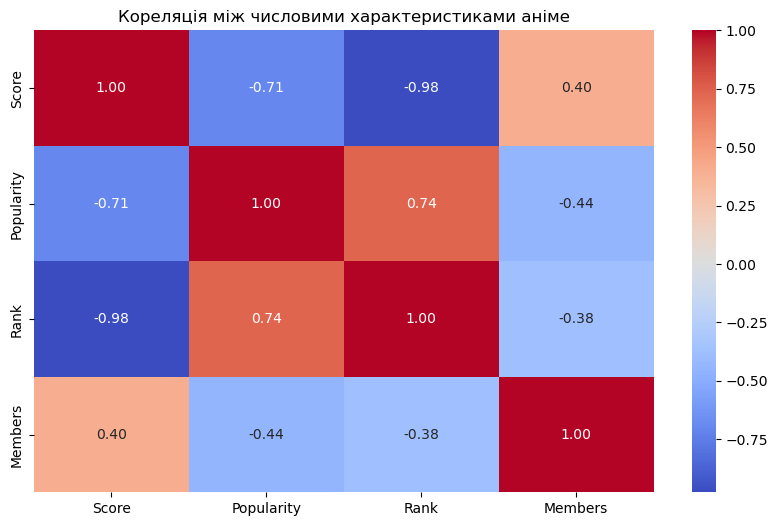

In [96]:
import seaborn as sns

# Замінюємо нечислові значення на NaN
numeric_data = anime_dataset[['Score', 'Popularity', 'Rank', 'Members']].apply(pd.to_numeric, errors='coerce')

# Видаляємо рядки з NaN
numeric_data = numeric_data.dropna()

# Обчислюємо кореляцію
correlation_matrix = numeric_data.corr()

# Побудова heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляція між числовими характеристиками аніме')
plt.show()



### Висновок з кореляції між числовими характеристиками аніме

1. **Сильна негативна кореляція**:
   - Між *Rank* та *Score* (-0.98): вищий рейтинг (менше значення Rank) пов'язаний з вищим середнім балом.
   - Між *Rank* та *Popularity* (-0.71): популярніші аніме мають вищі ранги.

2. **Середня позитивна кореляція**:
   - Між *Score* та *Members* (0.40): аніме з вищим балом частіше переглядаються великою аудиторією.

3. **Взаємозв’язок між *Popularity* та *Members***:
   - Помірна кореляція (0.74) показує, що більш популярні аніме мають більшу кількість членів спільноти.

### Загальний висновок:
Кореляція демонструє, що якість (високий *Score*) та популярність (високий *Members*) впливають на ранг аніме, але між цими характеристиками також є незалежність, що вказує на різні фактори вподобань глядачів.


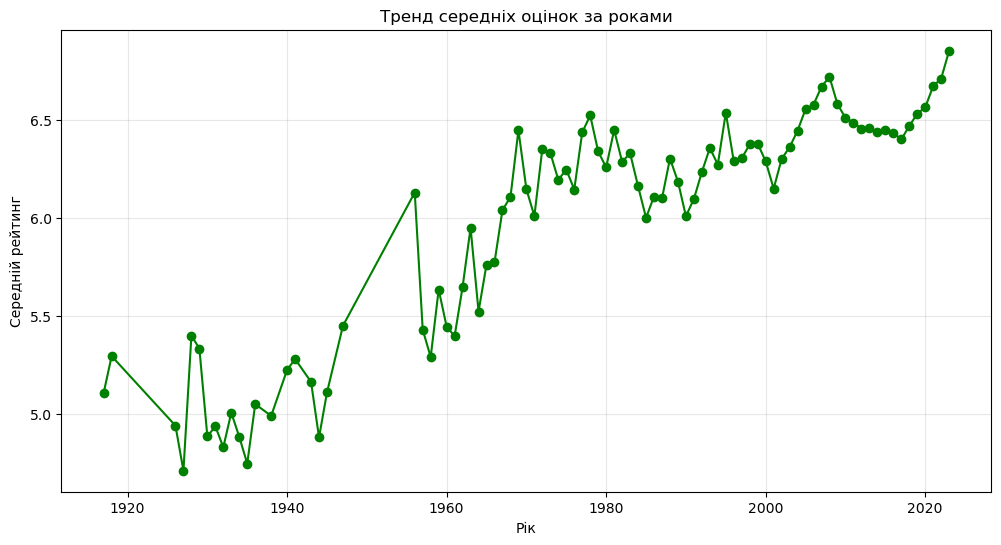

In [107]:
# Створюємо копію DataFrame для уникнення проблем з SettingWithCopyWarning
anime_dataset_cleaned = anime_dataset.copy()

# Замінюємо нечислові значення в Score на NaN
anime_dataset_cleaned['Score'] = pd.to_numeric(anime_dataset_cleaned['Score'], errors='coerce')

# Видаляємо рядки з NaN у Score
anime_dataset_cleaned = anime_dataset_cleaned.dropna(subset=['Score'])

# Оновлюємо стовпець Aired, залишаючи тільки першу дату
anime_dataset_cleaned['Aired'] = anime_dataset_cleaned['Aired'].str.extract(r'(^\w+ \d{1,2}, \d{4})')

# Перетворення 'Aired' на рік
anime_dataset_cleaned['Year'] = pd.to_datetime(anime_dataset_cleaned['Aired'], errors='coerce').dt.year

# Групування середніх оцінок за роками
yearly_scores = anime_dataset_cleaned.groupby('Year')['Score'].mean().dropna().reset_index()

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(yearly_scores['Year'], yearly_scores['Score'], marker='o', linestyle='-', color='green')
plt.title('Тренд середніх оцінок за роками')
plt.xlabel('Рік')
plt.ylabel('Середній рейтинг')
plt.grid(alpha=0.3)
plt.show()


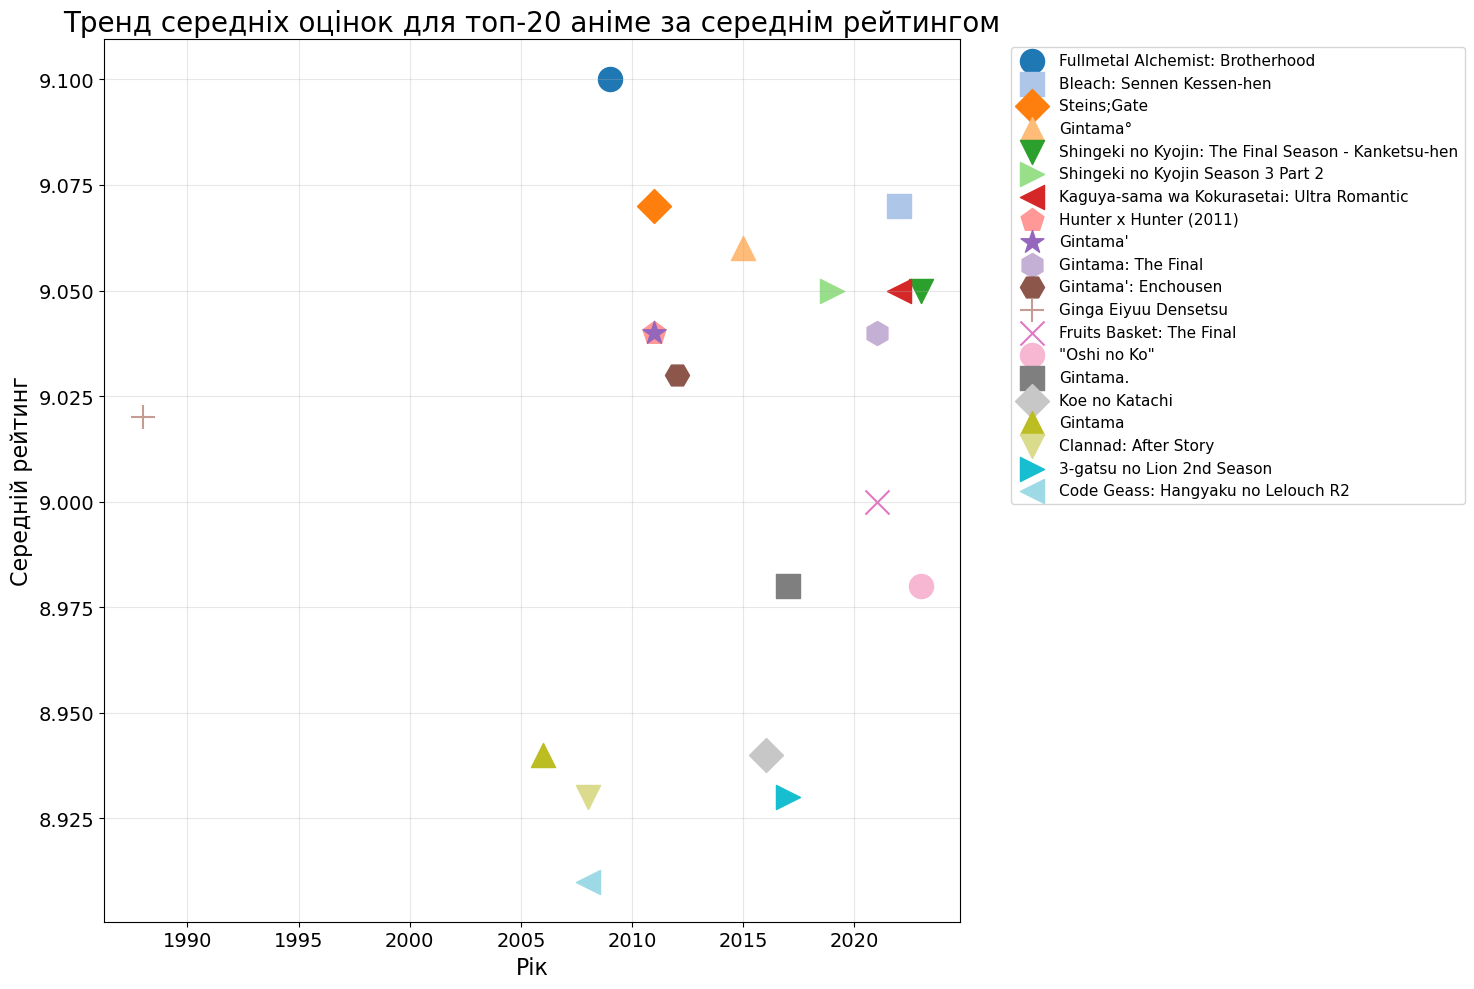

In [147]:
import itertools
from matplotlib import cycler

# Налаштування кольорів і маркерів
colors = plt.cm.tab20.colors  # Набір із 20 кольорів
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', '+', 'x']  # Різні маркери
marker_cycle = itertools.cycle(markers)  # Циклічний ітератор для маркерів

# Налаштування кольорової палітри
plt.figure(figsize=(15, 10))
plt.gca().set_prop_cycle(cycler('color', colors))

for anime_name in top_20_score_anime['Name']:
    anime_data = top_20_yearly_scores[top_20_yearly_scores['Name'] == anime_name]
    marker = next(marker_cycle)  # Вибираємо наступний маркер
    if len(anime_data) > 1:  # Якщо є більше одного року даних
        plt.plot(anime_data['Year'], anime_data['Score'], marker=marker, linestyle='-', markersize=10, label=anime_name)
    else:
        plt.scatter(anime_data['Year'], anime_data['Score'], s=300, marker=marker, label=anime_name)  # Для одиничних точок

# Налаштування підписів і лейблів
plt.title('Тренд середніх оцінок для топ-20 аніме за середнім рейтингом', fontsize=20)
plt.xlabel('Рік', fontsize=16)
plt.ylabel('Середній рейтинг', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Легенда
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=11)  # Легенда справа, в два стовпці
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Висновки за графіками:

1. **Тренд середніх оцінок за роками**:
   - Середні оцінки аніме поступово зростають із роками, що може вказувати на покращення якості контенту або зростання вимогливості аудиторії.
   - Особливо помітний стрибок у середніх оцінках починаючи з 2000-х років, що збігається із популяризацією аніме на міжнародному рівні.

2. **Тренд середніх оцінок для топ-20 аніме за середнім рейтингом**:
   - Найвищо оцінені аніме сконцентровані у проміжку між 2005 і 2020 роками, що говорить про зростання якості анімації, сюжету та впливу на аудиторію.
   - Деякі аніме мають стабільно високий рейтинг протягом багатьох років (наприклад, *Fullmetal Alchemist: Brotherhood* та *Steins;Gate*).
   - Висока конкуренція між популярними серіями може свідчити про підвищені очікування глядачів.

### Загальний висновок:
Аналіз показує, що сучасні аніме (після 2000-х) мають більший вплив на глядачів, отримуючи вищі середні оцінки. Це може бути результатом інновацій в анімації, покращення якості сценаріїв і розширення аудиторії аніме у всьому світі. Топ-рейтингові серії зберігають свою популярність завдяки високій якості та постійному інтересу з боку фанатів.


### Аналіз тривалості аніме та її впливу на рейтинг
Ми можемо дослідити, чи існує залежність між тривалістю епізодів аніме та їхнім середнім рейтингом (Score)

  Duration_Group     Score
0        <10 min  5.874048
1      10-20 min  6.336330
2      20-30 min  6.743828
3      30-60 min  6.568278
4     60-120 min       NaN
5       >120 min       NaN


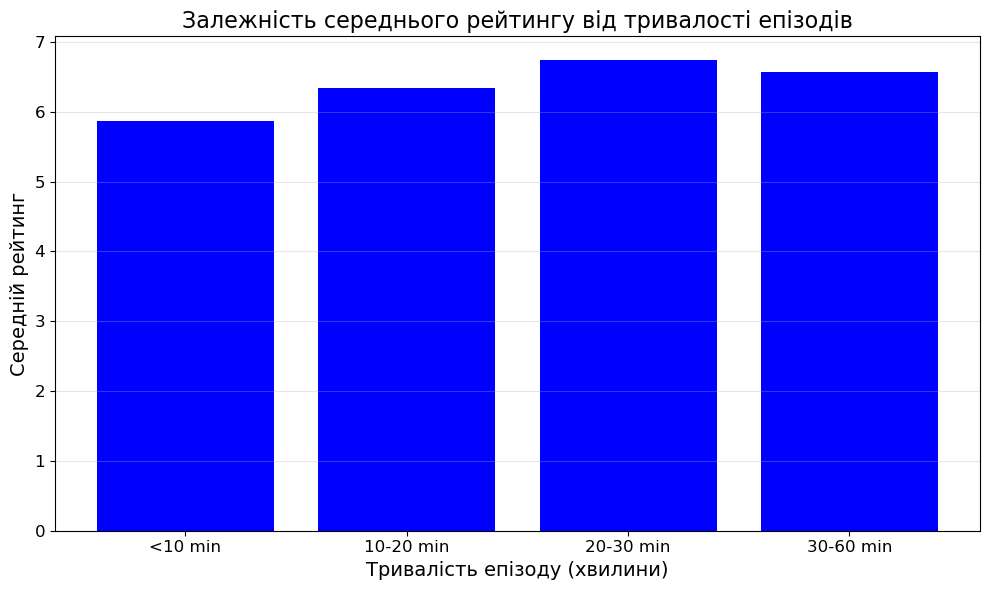

In [163]:
import re

# Функція для переведення тривалості в хвилини
def parse_duration(duration):
    if pd.isnull(duration):
        return None
    match = re.search(r'(\d+)\s*min', duration)
    if match:
        return int(match.group(1))
    return None

# Перетворення тривалості в хвилини
anime_dataset_cleaned['Duration_Minutes'] = anime_dataset_cleaned['Duration'].apply(parse_duration)

# Створення груп тривалості (бінінг)
bins = [0, 10, 20, 30, 60, 120, 300]
labels = ['<10 min', '10-20 min', '20-30 min', '30-60 min', '60-120 min', '>120 min']
anime_dataset_cleaned['Duration_Group'] = pd.cut(anime_dataset_cleaned['Duration_Minutes'], bins=bins, labels=labels)

# Групування даних за тривалістю та обчислення середніх оцінок
duration_analysis = anime_dataset_cleaned.groupby('Duration_Group', observed=False)['Score'].mean().reset_index()

# Виведення результатів
print(duration_analysis)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.bar(duration_analysis['Duration_Group'], duration_analysis['Score'], color='blue')
plt.title('Залежність середнього рейтингу від тривалості епізодів', fontsize=16)
plt.xlabel('Тривалість епізоду (хвилини)', fontsize=14)
plt.ylabel('Середній рейтинг', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Type               Movie     Music       ONA       OVA   Special        TV
Duration_Group                                                            
<10 min         5.461760  5.864959  5.815333  5.992743  6.190970  6.002316
10-20 min       6.169024  6.362500  6.488647  6.284306  6.449241  6.369896
20-30 min       6.584415  5.647500  6.811500  6.302024  6.699153  7.000717
30-60 min       6.977698  5.912500  6.624828  5.968424  6.695668  6.729091


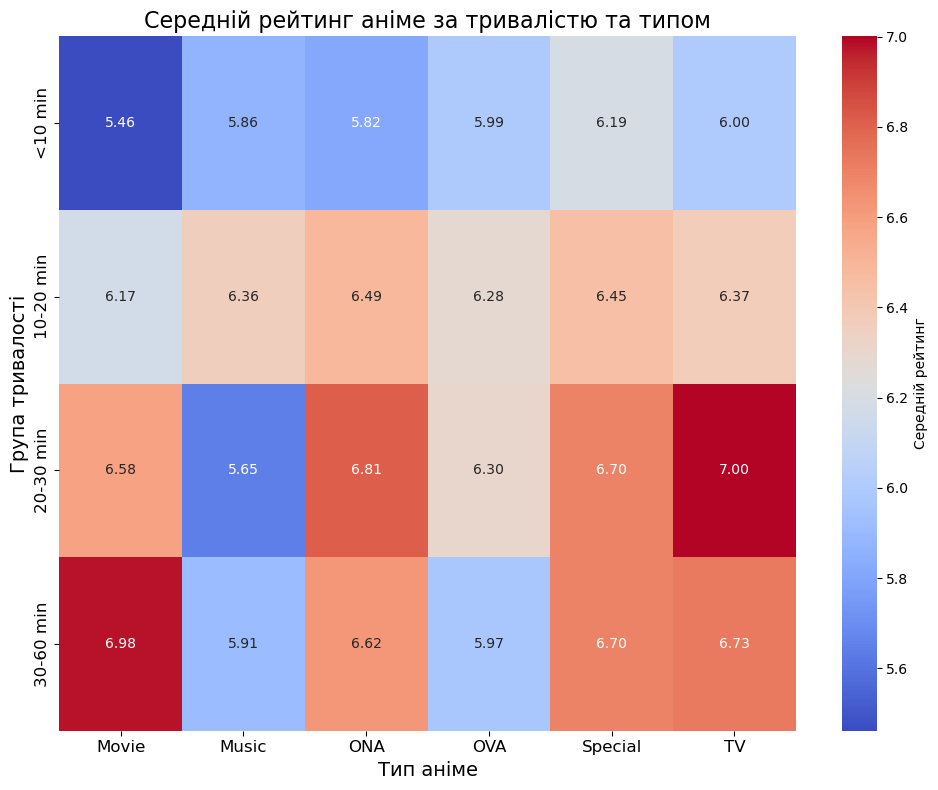

In [161]:
import seaborn as sns

# Фільтруємо дані, виключаючи типи "UNKNOWN" і порожні значення
filtered_data = anime_dataset_cleaned[
    (anime_dataset_cleaned['Type'] != 'UNKNOWN') & 
    (~anime_dataset_cleaned['Duration_Group'].isna())
]

# Створення зведеної таблиці
pivot_table = filtered_data.pivot_table(
    values='Score',            # Значення для обчислення
    index='Duration_Group',    # Рядки - групи тривалості
    columns='Type',            # Стовпці - типи аніме
    aggfunc='mean',            # Обчислюємо середнє значення
    fill_value=0,              # Заповнюємо відсутні значення нулями
    observed=False             # Вимкнено майбутню зміну поведінки
)

# Виводимо зведену таблицю
print(pivot_table)

# Візуалізація: Теплова карта
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Середній рейтинг'})
plt.title('Середній рейтинг аніме за тривалістю та типом', fontsize=16)
plt.xlabel('Тип аніме', fontsize=14)
plt.ylabel('Група тривалості', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Висновки:

1. **Залежність середнього рейтингу від тривалості епізодів (Бар-графік):**
   - Найвищий середній рейтинг мають епізоди тривалістю від 30 до 60 хвилин.
   - Епізоди тривалістю менше 10 хвилин отримують найнижчі середні оцінки. Це може бути пов'язано з обмеженими можливостями розкриття сюжету у коротких епізодах.
   - У проміжках тривалості 10-20 хвилин та 20-30 хвилин середні оцінки зростають поступово.

2. **Середній рейтинг за тривалістю та типом аніме (Теплова карта):**
   - Найвищий середній рейтинг має формат *TV* (30-60 хвилин), що досягає оцінки близько 7.0. Це підтверджує популярність телевізійних серіалів із тривалішими епізодами.
   - Формат *Movie* також отримує високі оцінки, особливо у тривалостях 30-60 хвилин.
   - *Music* та *Special* мають загалом нижчі оцінки, особливо в категоріях із коротшими епізодами (<10 хвилин).
   - *OVA* (Original Video Animation) і *ONA* (Original Net Animation) демонструють стабільні середні оцінки незалежно від тривалості.

### Загальний висновок:
- Тривалість епізодів значно впливає на середні оцінки аніме: довші епізоди (30-60 хвилин) мають більше можливостей для розкриття сюжету та формування емоційного зв’язку з аудиторією.
- Формат *TV* залишається лідером за якістю та популярністю, а *Movie* закріплює позиції завдяки кінематографічному підходу та довшій тривалості епізодів.
- Короткі формати, такі як *Music* чи *Special*, отримують нижчі середні оцінки, що може свідчити про їхню специфічність та обмежену аудиторію.


### Аналіз на основі статистичного тесту

Ми можемо провести аналіз, щоб перевірити, чи існує статистично значуща різниця між середніми рейтингами аніме для двох різних форматів, наприклад, **TV** та **Movie**.

---

#### **Гіпотеза**

- **Нульова гіпотеза (H₀):**  
  Середні рейтинги для форматів *TV* та *Movie* однакові.

- **Альтернативна гіпотеза (H₁):**  
  Середні рейтинги для форматів *TV* та *Movie* відрізняються.

---

#### **Метод аналізу**

Для перевірки цієї гіпотези використовується **t-тест Стьюдента для незалежних вибірок**. Цей тест дозволяє визначити, чи є різниця між середніми оцінками статистично значущою.


In [173]:
from scipy.stats import ttest_ind

# Фільтруємо дані для форматів TV та Movie
tv_scores = anime_dataset_cleaned[anime_dataset_cleaned['Type'] == 'TV']['Score'].dropna()
movie_scores = anime_dataset_cleaned[anime_dataset_cleaned['Type'] == 'Movie']['Score'].dropna()

# Виконання t-тесту
t_stat, p_value = ttest_ind(tv_scores, movie_scores, equal_var=False)  # equal_var=False для різної дисперсії

# Виведення результатів
print(f"T-статистика: {t_stat:.2f}")
print(f"P-значення: {p_value:.4f}")

# Інтерпретація результатів
alpha = 0.05
if p_value < alpha:
    print("Відхиляємо нульову гіпотезу: між форматами TV і Movie існує статистично значуща різниця.")
else:
    print("Не можемо відхилити нульову гіпотезу: середні рейтинги для форматів TV і Movie однакові.")


T-статистика: 19.87
P-значення: 0.0000
Відхиляємо нульову гіпотезу: між форматами TV і Movie існує статистично значуща різниця.


### Результати статистичного тесту

- **T-статистика:** 19.87  
- **P-значення:** 0.0000  

---

#### **Інтерпретація результатів**

Оскільки p-значення (0.0000) є значно меншим за рівень значущості (0.05), ми **відхиляємо нульову гіпотезу (H₀)**. Це означає, що:

> **Між середніми рейтингами форматів *TV* та *Movie* існує статистично значуща різниця.**

Цей результат свідчить про те, що формати *TV* та *Movie* мають суттєві відмінності в середніх оцінках, що може бути наслідком відмінностей у тривалості, структурі сюжету чи аудиторії.


# Використанням MySQL

У цьому розділі ми інтегруємо аналіз даних із використанням MySQL. Основна мета – створити зведену таблицю, обробити дані через SQL-запити та експортувати результати для подальшого аналізу.

---

### **Етапи:**

1. **Імпорт даних у MySQL:**  
   Завантажуємо очищені дані аніме, оцінок користувачів та профілів у базу даних MySQL.

2. **Створення таблиць:**  
   Створюємо таблиці для:
   - Даних про аніме.
   - Даних про оцінки користувачів.
   - Даних про профілі користувачів.

3. **Виконання SQL-запитів:**  
   Використовуємо SQL для виконання аналітичних запитів, таких як:
   - Аналіз популярності жанрів.
   - Визначення рейтингу аніме за країнами.
   - Аналіз середнього рейтингу за типами аніме.

4. **Експорт результатів:**  
   Результати запитів експортуємо назад у Python для подальшої візуалізації.


# Висновки та рекомендації: Аналіз аніме для оптимізації продажів атрибутики

## **1. Основні висновки з аналізу**

### **Популярність жанрів**
- Найпопулярніші жанри, які отримують високі оцінки, – це **Comedy**, **Fantasy**, і **Drama**.
- Жанри з більшою аудиторією, такі як **Action**, **Adventure**, і **Slice of Life**, також показали стабільний попит, навіть якщо середні рейтинги трохи нижчі.

### **Популярність форматів**
- Формат **TV** домінує за популярністю та середніми рейтингами. Це найкраща категорія для створення довготривалих серіалів.
- Формат **Movie** отримує високі рейтинги, особливо для проєктів із тривалістю 30-60 хвилин, що вказує на якість контенту та сильну емоційну прив'язку.
- Формати **OVA** та **ONA** менш популярні, але їхня аудиторія є більш вузькою та специфічною, що дозволяє продавати нішеву атрибутику.

### **Вплив тривалості епізодів**
- Найвищі рейтинги отримують епізоди тривалістю від 30 до 60 хвилин. Це підтверджує важливість якісного часу для розкриття сюжету.
- Короткі епізоди (менше 10 хвилин) мають низькі середні оцінки, що робить їх менш привабливими для аудиторії.

### **Різниця в оцінках чоловіків і жінок**
- Чоловіки надають перевагу жанрам **Action** та **Sci-Fi**, тоді як жінки віддають перевагу **Romance** і **Drama**.
- Це відкриває можливості для гендерно орієнтованої продукції, наприклад, постерів, колекційних фігурок або тематичного одягу.

### **Рейтинг топових аніме**
- Такі аніме, як *Fullmetal Alchemist: Brotherhood*, *Attack on Titan*, і *Steins;Gate*, стабільно займають верхні позиції.
- Популярні персонажі з цих аніме можуть бути використані для створення аксесуарів, одягу або навіть брендованих продуктів.

---

## **2. Як заробити на цьому?**

### **Рекомендації щодо продажів атрибутики**

1. **Фокус на популярних жанрах і форматах**
   - Орієнтуйтеся на жанри **Comedy**, **Drama**, і **Action**, оскільки вони мають широку аудиторію.
   - Пропонуйте атрибутику для **TV-серіалів**, оскільки вони найбільш популярні серед шанувальників.

2. **Гендерно орієнтована продукція**
   - Для чоловіків:
     - Фігурки та постери з персонажами з *Attack on Titan*, *One Punch Man*, або *Hunter x Hunter*.
   - Для жінок:
     - Тематичний одяг, сумки або прикраси, пов’язані з *Kaguya-sama: Love is War* чи *Fruits Basket*.

3. **Ексклюзивні продукти для фанатів нішевих форматів**
   - *OVA* та *ONA* мають вузьку, але лояльну аудиторію. Запропонуйте обмежені серії атрибутики (наприклад, колекційні карти, обкладинки для книг або аксесуари).

4. **Створення контенту для нішевих жанрів**
   - Наприклад, жанри **Slice of Life** та **Fantasy** приваблюють довготривалих шанувальників, тому можна випускати аксесуари з персонажами для щоденного використання (чашки, блокноти тощо).

5. **Експлуатація популярності аніме-фільмів**
   - Фільми з високими рейтингами, наприклад, *Demon Slayer: Mugen Train*, можуть стати основою для рекламних кампаній або великих запусків товарів, як-от фігурки чи плакати.

---

### **Маркетингові ідеї**

1. **Сезонні колекції**
   - Створюйте атрибутику на основі популярності сезонних трендів аніме (наприклад, зимові або літні колекції).

2. **Колекційні товари**
   - Обмежені серії фігурок, наклейок або значків для колекціонерів.

3. **Партнерство з фестивалями**
   - Випуск тематичних продуктів під час аніме-фестивалів або заходів.

4. **Лояльність аудиторії**
   - Запропонуйте програму лояльності, де шанувальники отримують бонуси за покупки атрибутики улюблених серій.

---

## **3. Потенційний дохід**

1. **Фігурки:** Високий прибуток через колекційну цінність.
2. **Одяг та аксесуари:** Масовий продаж завдяки ширшій аудиторії.
3. **Ексклюзивні товари:** Підвищення вартості завдяки обмеженому тиражу.
4. **Цифрові продукти:** Наприклад, артбуки, шпалери або VR-досвід, пов'язаний із популярними аніме.

